In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

df = pd.read_csv("memory_distraction_data.csv")

X = df[['flashing_elements', 'animated_components', 'label_density']]
y = df['right_answer']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
joblib.dump(clf, "random_forest_cognitive_model.pkl")


Validation Accuracy: 80.00%


['random_forest_cognitive_model.pkl']

In [22]:
import joblib
import pandas as pd

model = joblib.load("random_forest_cognitive_model.pkl")

new_data = pd.DataFrame([{
    "flashing_elements": 2838,
    "animated_components": 52,
    "label_density": 1269
}])

prediction = model.predict(new_data)
print("User remembered correctly:" if prediction[0] == 1 else "User failed to recall.")


User failed to recall.


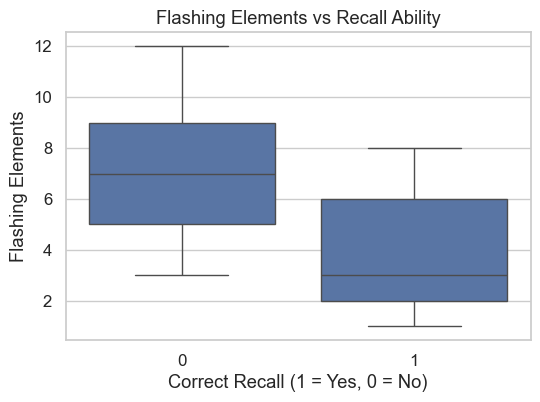

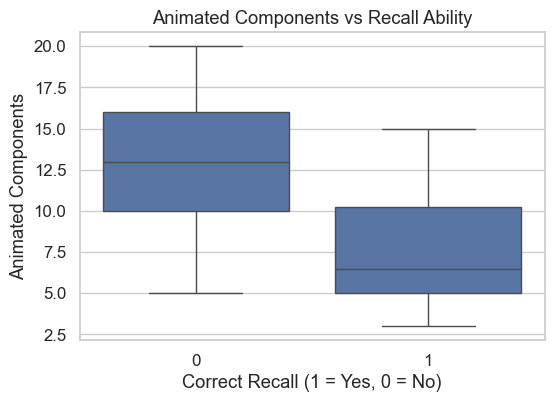

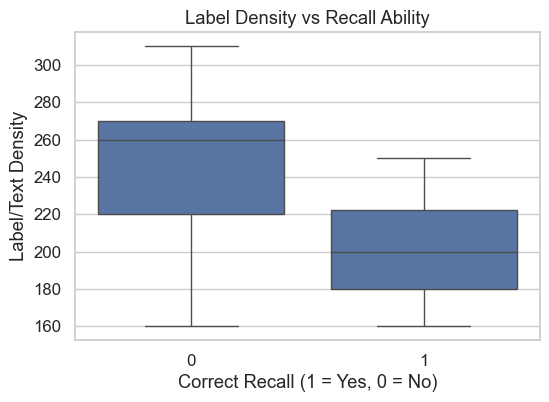

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("memory_distraction_data.csv")
df['right_answer'] = df['right_answer'].astype(int)

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(6, 4))
sns.boxplot(x='right_answer', y='flashing_elements', data=df)
plt.title("Flashing Elements vs Recall Ability")
plt.xlabel("Correct Recall (1 = Yes, 0 = No)")
plt.ylabel("Flashing Elements")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='right_answer', y='animated_components', data=df)
plt.title("Animated Components vs Recall Ability")
plt.xlabel("Correct Recall (1 = Yes, 0 = No)")
plt.ylabel("Animated Components")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='right_answer', y='label_density', data=df)
plt.title("Label Density vs Recall Ability")
plt.xlabel("Correct Recall (1 = Yes, 0 = No)")
plt.ylabel("Label/Text Density")
plt.show()
